# # Exploratory Data Analysis (EDA)
# **Objective**: Understand the UTKFace dataset's age distribution and image characteristics


In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [12]:
# Configuration
DATA_DIR = "C:\\Users\\mjarb\\OneDrive\\Bureau\\Project 4\\MachineLearningProject\\data\\raw\\UTKFace"
SAMPLE_SIZE = 5  # Images to display

100%|██████████| 23708/23708 [00:00<00:00, 472571.81it/s]

Total valid files: 23705/23708

Sample data:


,age,gender,ethnicity,valid,filename
0,100,0,0,True,100_0_0_20170112213500903.jpg.chip.jpg
1,100,0,0,True,100_0_0_20170112215240346.jpg.chip.jpg
2,100,1,0,True,100_1_0_20170110183726390.jpg.chip.jpg
3,100,1,0,True,100_1_0_20170112213001988.jpg.chip.jpg
4,100,1,0,True,100_1_0_20170112213303693.jpg.chip.jpg


FileNotFoundError: [Errno 2] No such file or directory: '../../outputs/figures/age_distribution_clean.png'

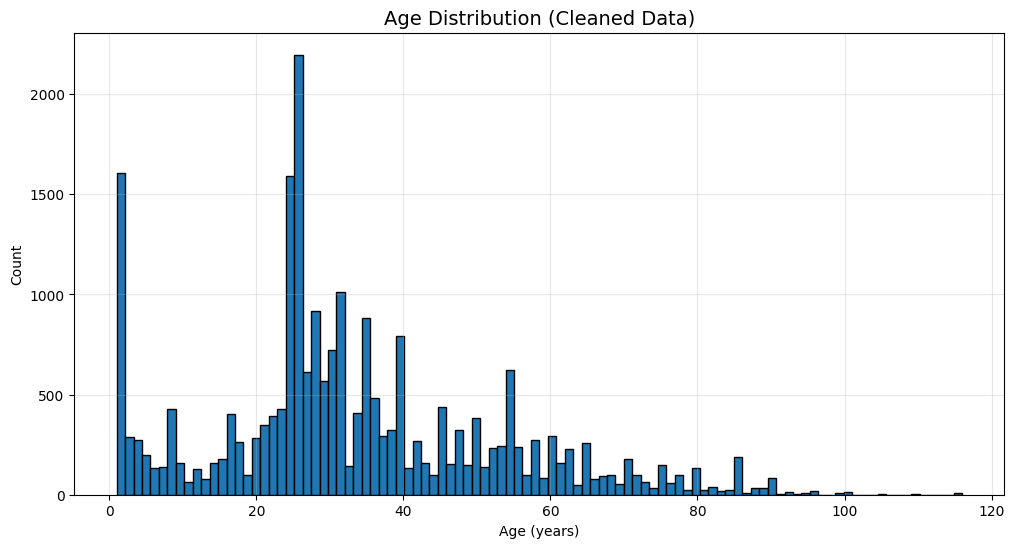

In [13]:

def parse_filename(filename):
    """Robust UTKFace filename parser that handles edge cases"""
    parts = filename.split('_')
    
    try:
        # Case 1: Standard format (age_gender_ethnicity_date.jpg)
        if len(parts) >= 3 and parts[0].isdigit() and parts[1].isdigit() and parts[2].isdigit():
            return {
                'age': int(parts[0]),
                'gender': int(parts[1]),
                'ethnicity': int(parts[2]),
                'valid': True
            }
        # Case 2: Some files have format like 101_1.jpg
        elif len(parts) == 2 and parts[0].isdigit() and parts[1].split('.')[0].isdigit():
            return {
                'age': int(parts[0]),
                'gender': int(parts[1].split('.')[0]),
                'ethnicity': -1,  # Unknown
                'valid': True
            }
    except:
        pass
    
    return {'valid': False}

# %% [code]
# Process all files
metadata = []
valid_files = []

for filename in tqdm(os.listdir(DATA_DIR)):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        data = parse_filename(filename)
        if data['valid']:
            metadata.append(data)
            valid_files.append(filename)

# Create DataFrame
df = pd.DataFrame(metadata)
df['filename'] = valid_files

print(f"Total valid files: {len(df)}/{len(os.listdir(DATA_DIR))}")
print("\nSample data:")
display(df.head())

# %% [code]
# Age Distribution Plot
plt.figure(figsize=(12, 6))
plt.hist(df['age'], bins=100, edgecolor='black')
plt.title('Age Distribution (Cleaned Data)', fontsize=14)
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.grid(alpha=0.3)
plt.savefig('../../outputs/figures/age_distribution_clean.png')
plt.show()

In [ ]:
# Age Distribution
plt.figure(figsize=(12, 6))
plt.hist(df['age'], bins=100, edgecolor='black')
plt.title('Age Distribution in UTKFace Dataset', fontsize=14)
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.grid(alpha=0.3)
plt.savefig('../../outputs/figures/age_distribution.png')
plt.show()

In [ ]:
# Sample Images
plt.figure(figsize=(15, 8))
for i, (_, row) in enumerate(df.sample(SAMPLE_SIZE).iterrows()):
    img = cv2.cvtColor(cv2.imread(os.path.join(DATA_DIR, row['filename'])), cv2.COLOR_BGR2RGB)
    plt.subplot(1, SAMPLE_SIZE, i+1)
    plt.imshow(img)
    plt.title(f"Age: {row['age']}\nGender: {row['gender']}")
    plt.axis('off')
plt.tight_layout()
plt.savefig('../../outputs/figures/sample_images.png')
plt.show()

# ## Key Findings:
# - Dataset contains **~24k images**
# - Age range: **1 to 116 years**
# - **Imbalance**: More young individuals (20-40) than elderly
# - Each image is **200×200 pixels** with 3 channels (RGB)